In [275]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

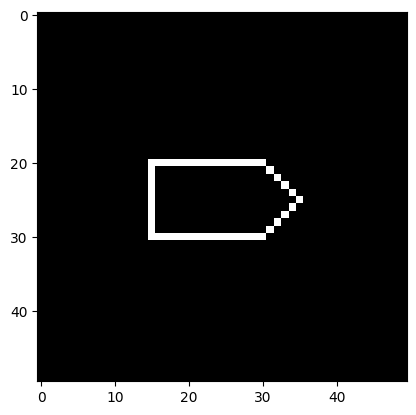

In [276]:
img = np.zeros([50,50], dtype=int)
pattern = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])
img[20:31,15:36] = pattern*255
plt.imshow(img, cmap='gray')

# ***Finding Chain Code from Shape***

In [277]:
# Discover the starting point
for i, row in enumerate(img):
    for j, value in enumerate(row):
        if value != 0:
            start_point = (i, j)
            break

print(start_point)

(30, 15)


In [278]:
directions = [0, 1, 2, 3, 4, 5, 6, 7]
change_i = [1, 1, 0, -1, -1, -1, 0, 1]
change_j = [0, 1, 1, 1, 0, -1, -1, -1]

In [279]:
border = []
chain = []
curr_point = start_point
for direction in directions:
    new_point = (start_point[0]+change_i[direction], start_point[1]+change_j[direction])
    if img[new_point] == 255: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

Here we are calculating the directions to search next in a way that ensures you won't revisit the same points and properly traverse the boundary.

By starting the search from b_direction, you ensure that you don't move backward and revisit already visited points, and by iterating clockwise (from b_direction to 7 and then from 0 to b_direction), you ensure that you continue to traverse the boundary in one direction until you reach the starting point again.

In [280]:
count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        new_point = (curr_point[0]+change_i[direction], curr_point[1]+change_j[direction])
        if img[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

In [281]:
print(chain)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [282]:
first_diff = []
for i in range(len(chain) - 1):
    first_diff.append(abs(chain[i + 1] - chain[i]) % 8)
print(first_diff)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [283]:
print(border)

[(30, 16), (30, 17), (30, 18), (30, 19), (30, 20), (30, 21), (30, 22), (30, 23), (30, 24), (30, 25), (30, 26), (30, 27), (30, 28), (30, 29), (30, 30), (29, 31), (28, 32), (27, 33), (26, 34), (25, 35), (24, 34), (23, 33), (22, 32), (21, 31), (20, 30), (20, 29), (20, 28), (20, 27), (20, 26), (20, 25), (20, 24), (20, 23), (20, 22), (20, 21), (20, 20), (20, 19), (20, 18), (20, 17), (20, 16), (20, 15), (21, 15), (22, 15), (23, 15), (24, 15), (25, 15), (26, 15), (27, 15), (28, 15), (29, 15), (30, 15)]


# ***Finding Shape from Chain Code***

Text(0.5, 1.0, 'Border')

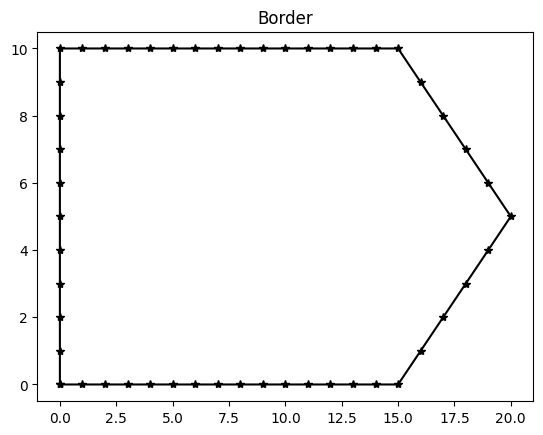

In [284]:
curr_pos = (0, 0)
directions = [(0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (-1, -1)]
boundary = [curr_pos]
for direction in chain:
    curr_pos = (curr_pos[0] + directions[direction][0], curr_pos[1] + directions[direction][1])
    boundary.append(curr_pos)

plt.plot(*zip(*boundary), marker='*', color='black', linestyle='-')
plt.title("Border")